In [2]:
# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels

# Visualization
import cv2 # for ingesting images
print('OpenCV: %s' % cv2.__version__) # print version
import matplotlib 
import matplotlib.pyplot as plt # for showing images
print('matplotlib: %s' % matplotlib.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
#print(main_dir)







Tensorflow/Keras: 2.10.0
pandas: 1.5.1
numpy: 1.23.2
sklearn: 1.1.3
OpenCV: 4.5.5
matplotlib: 3.5.3


## Importer les donnes

In [22]:
ImgLocationTrain = "dataset2-master/dataset2-master/images/TRAIN/"
ImgLocationTest = "dataset2-master/dataset2-master/images/TEST/"
ImgLocationVal = "dataset2-master/dataset2-master/images/TEST_SIMPLE/"

# List image categories we are interested in
LABELS = set(["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"])

ImagePathsTrain = []
ListLabelsTrain = []

ImagePathsTest = []
ListLabelsTest = []



for label in LABELS:
    for imageTrain in list(os.listdir(ImgLocationTrain+label)):
        ImagePathsTrain= ImagePathsTrain + [ImgLocationTrain + label +"/" + imageTrain]
        ListLabelsTrain = ListLabelsTrain + [label]


for label in LABELS:
    for imageTest in list(os.listdir(ImgLocationTest+label)):
        ImagePathsTest = ImagePathsTest + [ImgLocationTest + label +"/" + imageTest]
        ListLabelsTest = ListLabelsTest + [label]

dataTrain = []
dataTest = []

for imgTrain in ImagePathsTrain:
    image = cv2.imread(imgTrain)
    image = cv2.resize(image, (128, 128))
    dataTrain.append(image)

for imgTest in ImagePathsTest:
    image = cv2.imread(imgTest)
    image = cv2.resize(image, (128, 128))
    dataTest.append(image)
    
dataTrain = np.array(dataTrain, dtype = "float") / 255.0
dataTest = np.array(dataTest, dtype = "float") / 255.0






In [23]:
print(dataTest.shape)

(2487, 128, 128, 3)


In [29]:
# Convert Labels list to numpy array
LabelsArrayTest = np.array(ListLabelsTest)
LabelsArrayTrain = np.array(ListLabelsTrain)

enc = OrdinalEncoder()
y_train = enc.fit_transform(LabelsArrayTrain.reshape(-1,1))
y_test = enc.fit_transform(LabelsArrayTest.reshape(-1,1))

X_train = dataTrain
X_test = dataTest


y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)




((9957, 1), (9957, 128, 128, 3))

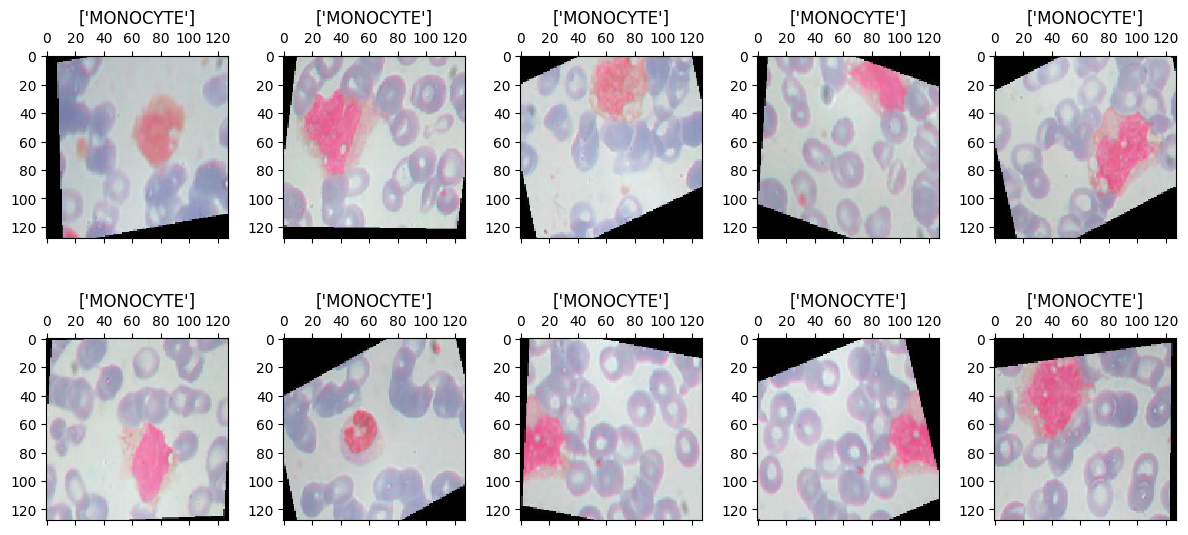

In [31]:
# Display images of 10 cels in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(dataTrain[n])
        axs[i,j].set(title = enc.inverse_transform(y_train)[n])
        n=n+1
plt.show()

In [66]:

#--- Define a Model
model = Sequential(name="DCN-Model") # Model


#--- Input Layer 
# Specify input shape [rows, columns, channels]
model.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs


#--- First Set of Convolution, Max Pooling and Droput Layers (all parameters shown)
model.add(Conv2D(filters=16, # Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
                 kernel_size=(3,3),
                 activation='relu', 
                )
         ) 

model.add(MaxPool2D(strides=(2,2))
         ) # Max Pooling Layer,

model.add(Dropout(0.2)) # Dropout Layer


#--- Second Set of Convolution, Max Pooling and Droput Layers 
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')) # Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid')) # Second Max Pooling Layer,
model.add(Dropout(0.2, name='Dropout-Layer-2')) # Dropout Layer


#--- Third Set of Convolution, Max Pooling and Droput Layers
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')) # Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same')) # Second Max Pooling Layer,
model.add(Dropout(0.2)) # Dropout Layer


#--- Feed-Forward Densely Connected Layer and Output Layer (note, flattening is required to convert from 2D to 1D shape)
model.add(Flatten(name='Flatten-Layer')) # Flatten the shape so we can feed it into a regular densely connected layer
model.add(Dense(16, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal')) # Hidden Layer, relu(x) = max(x, 0)
model.add(Dense(4, activation='softmax', name='Output-Layer')) # Output Layer, softmax(x) = exp(x) / tf.reduce_sum(exp(x))





In [67]:
# model compile

model.compile(optimizer = 'adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ['Accuracy'])






In [ ]:
history = model.fit(X_train, y_train, batch_size=1, epochs = 10)

Epoch 1/10


/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2022-11-14 22:33:54.208468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9957/9957 [==============================] - 89s 9ms/step - loss: 1.3879 - Accuracy: 0.2416
Epoch 2/10
9957/9957 [==============================] - 88s 9ms/step - loss: 1.3866 - Accuracy: 0.2547
Epoch 3/10
4673/9957 [=============>................] - ETA: 46s - loss: 1.3870 - Accuracy: 0.2502

In [64]:


pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train),axis=1))
# Predict class labels on a test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test),axis=1))





78/78 [==============================] - 3s 36ms/step


In [65]:


##### Step 5 - Model Performance Summary
print("")
print('------------------------- Model Summary -------------------------')
model.summary() # print model summary
print("")
    
print("")
print('------------------------- Encoded Names -------------------------')
for i in range(0,len(enc.categories_[0])):
    print(i,": ",enc.categories_[0][i])
print("")

print('------------------ Evaluation on Training Data ------------------')
# Print the last value in the evaluation metrics contained within history file
for item in history.history:
    print("Final", item, ":", history.history[item][-1])
print("")
# Print classification report
print(classification_report(y_train, pred_labels_tr))
print("")

print('-------------------- Evaluation on Test Data --------------------')
print(classification_report(y_test, pred_labels_te))
print("")





------------------------- Model Summary -------------------------
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        36928     
                                                     